#Exploratory Data Analysis (EDA)
Objective: Extract insights using visual and statistical exploration.

# IMPORTING LIBRARIES AND LOADING DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Styling for visual appeal
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Check fro missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Handli missing Age values
df['Age'].fillna(df['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
#Handle missing Embarked values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [12]:
df.drop('Cabin', axis=1, inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

BASIC OVERVIEW AND STRUCTURE

In [14]:
#Data Summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [18]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [20]:
#Value counts for Categorical features
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# UNIVARIATE VISUALS (Single Feature Distribution)

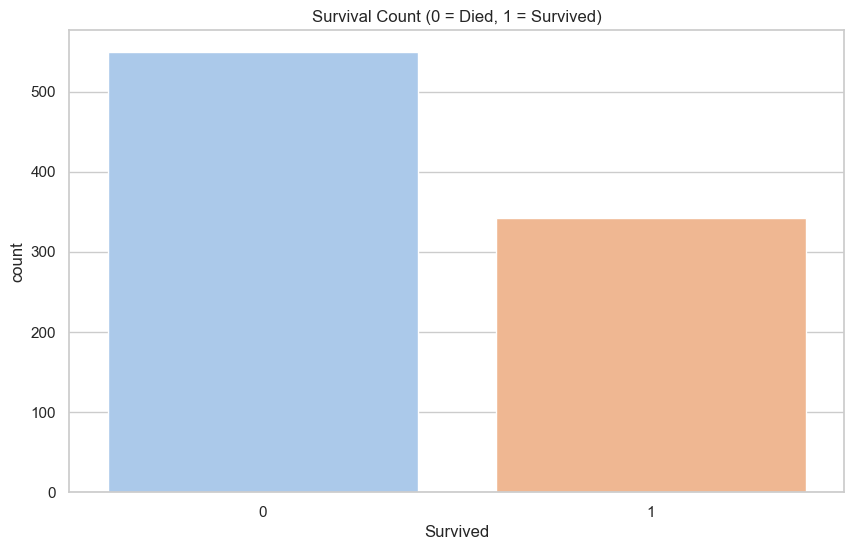

In [22]:
#Survival Distribution
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

#Observation - Survival Distribution
The chart shows that a larger number of passengers did not survive the Titanic disaster.
Around 550+ passengers died (Died = 0), while approximately 340+ passengers survived (Survived = 1).
This means that roughly 62% of the passengers died, and only 38% survived.

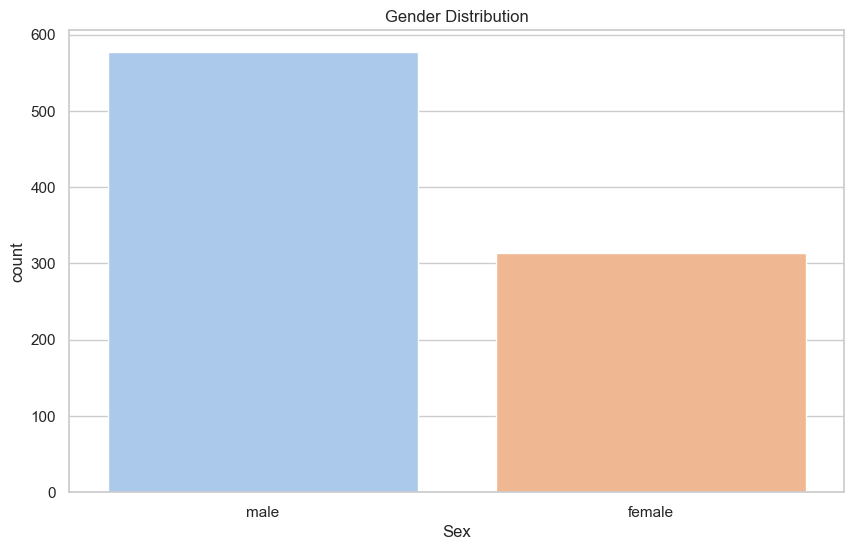

In [23]:
#Gender Distribution
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

#Observation - Gender DIstribution
The dataset has a higher number of male passengers compared to female passengers.
Approximately 580 males and 310 females were on board.
This indicates a gender imbalance, with males forming about 65% of the passengers and females about 35%.
This imbalance may have implications on survival rate analysis based on gender.

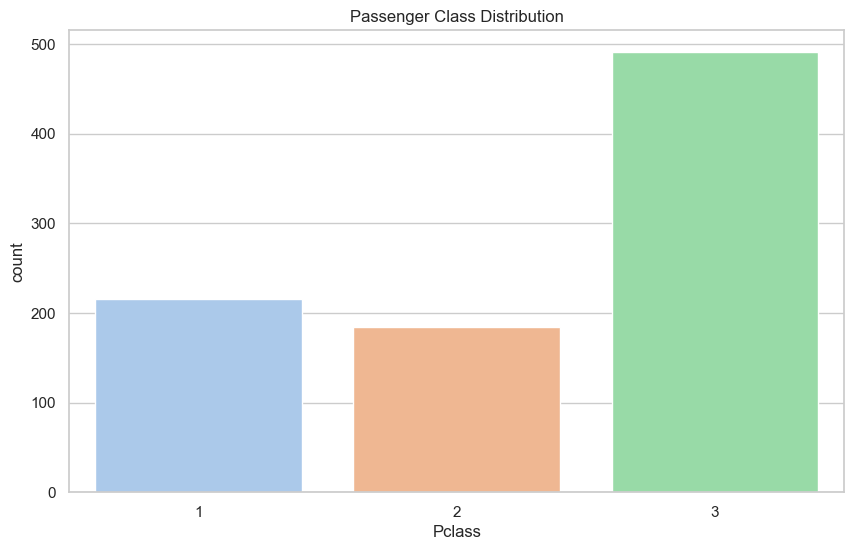

In [24]:
#Passenger Class Distribution
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

#Observation - Passenger Class Distribution
The majority of passengers belonged to 3rd class, with around 490 passengers, showing that this was the most common ticket class.
1st class had about 220 passengers, while 2nd class had around 180.
This suggests that a larger portion of the Titanic's passengers were from lower socio-economic backgrounds, which could be an important factor when analyzing survival chances based on class.
The imbalance also provides an opportunity to explore how class may have affected survival rate (often higher in 1st class).

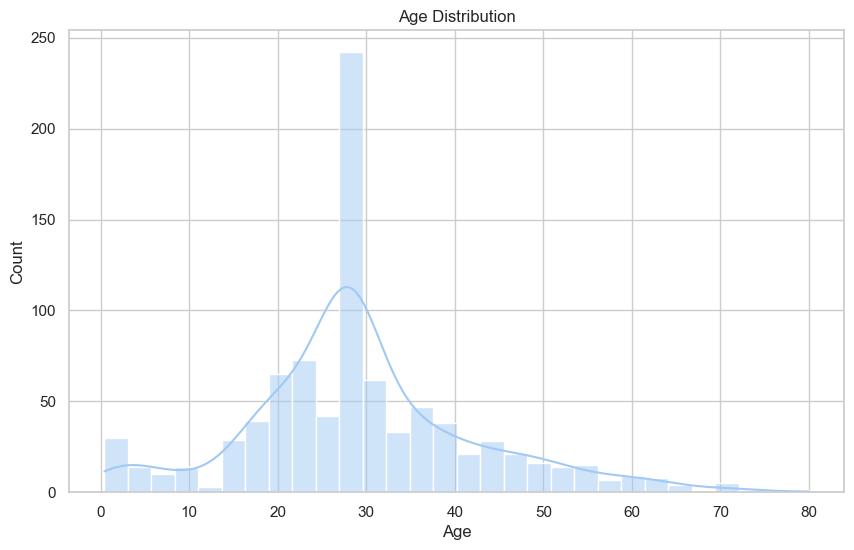

In [25]:
#Age Histogram
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

#Observation - Age Distribution
The age distribution is right-skewed, meaning most passengers were younger.
The most common age group lies roughly between 20 to 35 years, with a peak around age 28.
There are fewer elderly passengers (above 60), and a small number of very young children.
The distribution indicates that young adults formed the majority of passengers on board the Titanic.

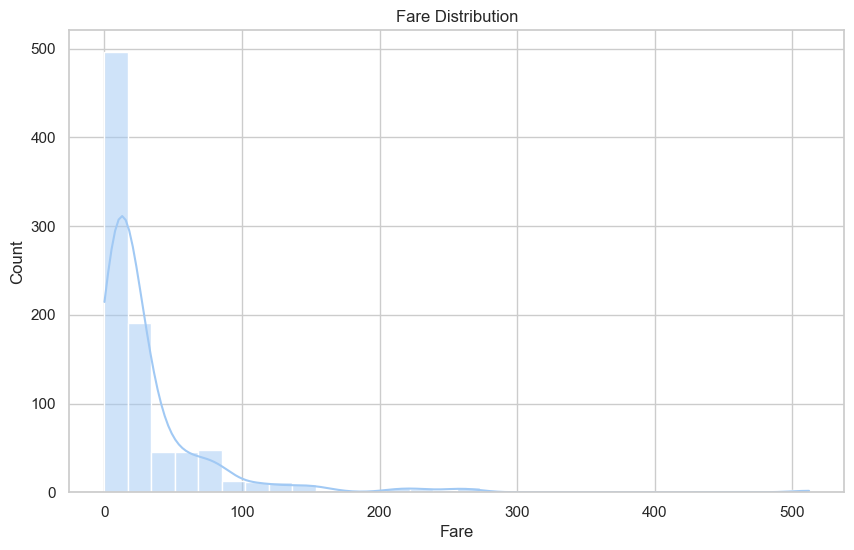

In [26]:
#Fare Distribution
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

#Observation - Fare Distribution
The distribution is highly right-skewed, indicating that most passengers paid lower fares, generally under 100.
A large number of passengers paid fares in the range of 0–50.
A few passengers paid very high fares (over 200 and even above 500) — these are likely first-class passengers with luxury accommodations.

# BIVARIATE VISUALS (Comparing 2 features)

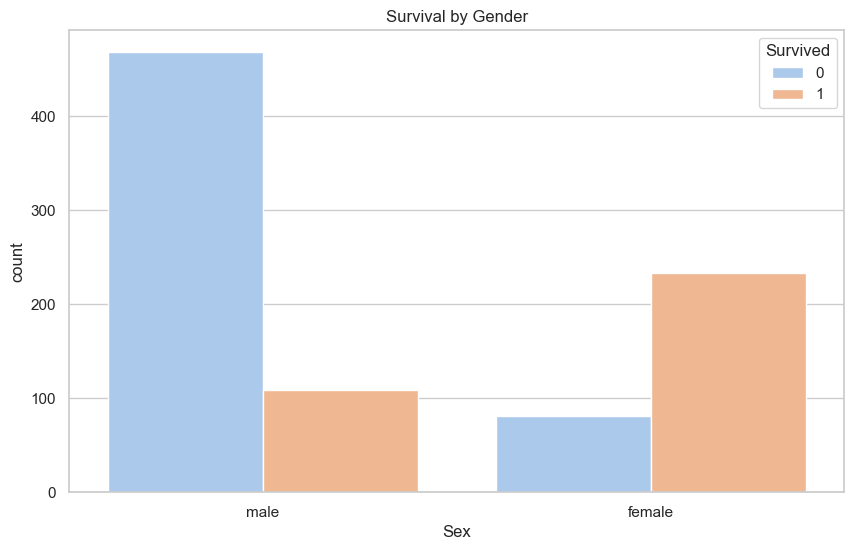

In [27]:
#Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

#Observation - Survival by Gender
Females had a much higher survival rate compared to males.
The majority of males did not survive, as indicated by the large blue bar.
In contrast, most females survived, shown by the dominant orange bar for females.
This reflects the historical "women and children first" evacuation protocol followed during the Titanic disaster.
Gender appears to be a strong predictor of survival and should be given importance in any modeling or feature analysis.

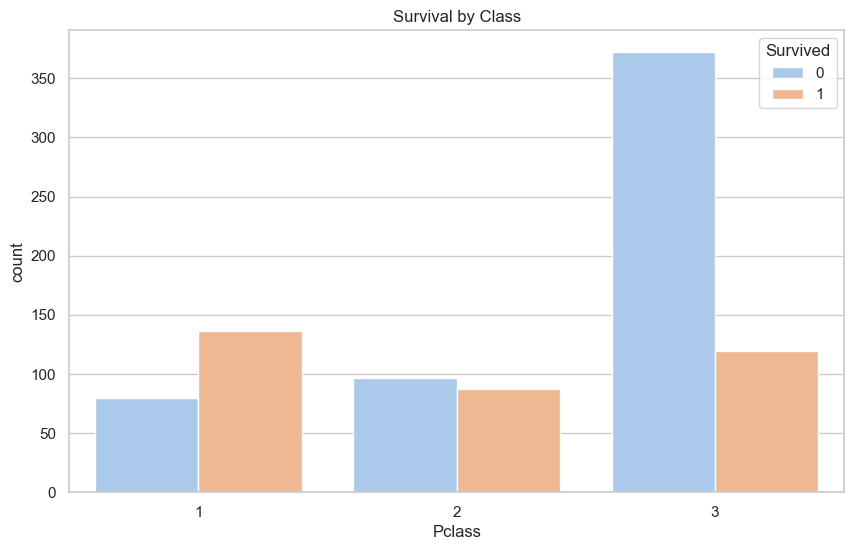

In [28]:
#Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Class")
plt.show()

#Observation - Survival by Pclass
1st Class passengers had a higher survival count than non-survivors, suggesting priority or better access to lifeboats.
2nd Class had a balanced distribution, with survival and non-survival counts being quite similar.
3rd Class passengers had a much higher number of non-survivors, indicating they were the most affected group during the disaster.
This pattern suggests that passenger class (Pclass) had a strong impact on survival, with higher-class passengers having a better chance of surviving.

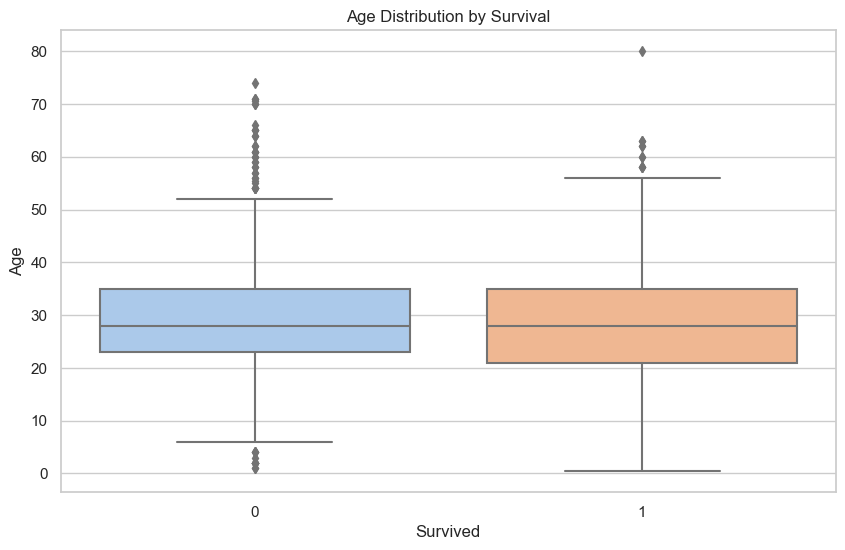

In [29]:
#Boxplot - Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

#Observation - Age vs Survived
Median age of survivors is slightly lower than non-survivors.
Children (age <10) had a higher survival rate.
More older outliers (age >60) are seen among non-survivors.
Survivors show more age variability.
Younger passengers were more likely to survive.

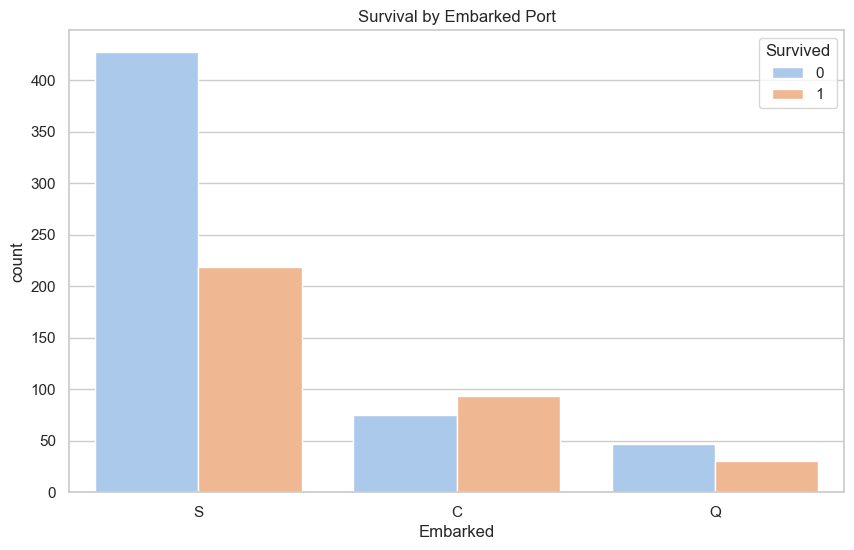

In [30]:
#Survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Embarked Port")
plt.show()

#Observation - Survival by Embarked Port
Most passengers embarked from port 'S' (Southampton), but the survival rate from this port was lower — many more non-survivors than survivors.
From port 'C' (Cherbourg), more passengers survived than died, indicating a higher survival rate for those who boarded there.
Passengers from port 'Q' (Queenstown) had fewer numbers overall, and more did not survive than survived.
This suggests that embarkation port might have had an indirect influence on survival — possibly linked with passenger class or socio-economic status.

# CORRELATION HEATMAP

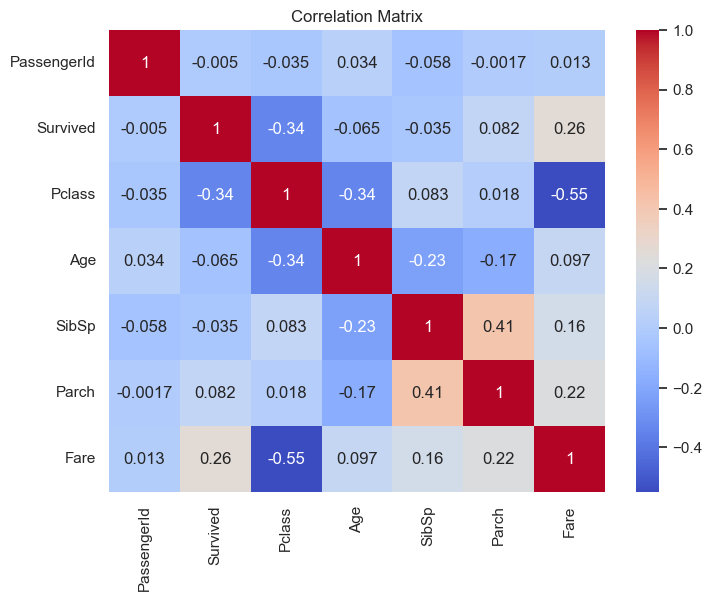

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#Observation - Correlation Map
Survived has:
A moderate negative correlation with Pclass (-0.34), meaning passengers from higher classes were more likely to survive.
A positive correlation with Fare (0.26), indicating that passengers who paid higher fares had better survival chances.
Fare and Pclass are strongly negatively correlated (-0.55), which makes sense — higher classes paid higher fares.
SibSp and Parch show a moderate positive correlation (0.41), suggesting that passengers with siblings/spouses often also had parents/children on board.
Age has weak or no strong correlation with survival directly, but a negative correlation with Pclass (-0.34), possibly implying younger people were more in lower classes.
Overall, Pclass and Fare appear to be key features influencing survival

# PAIRPLOT

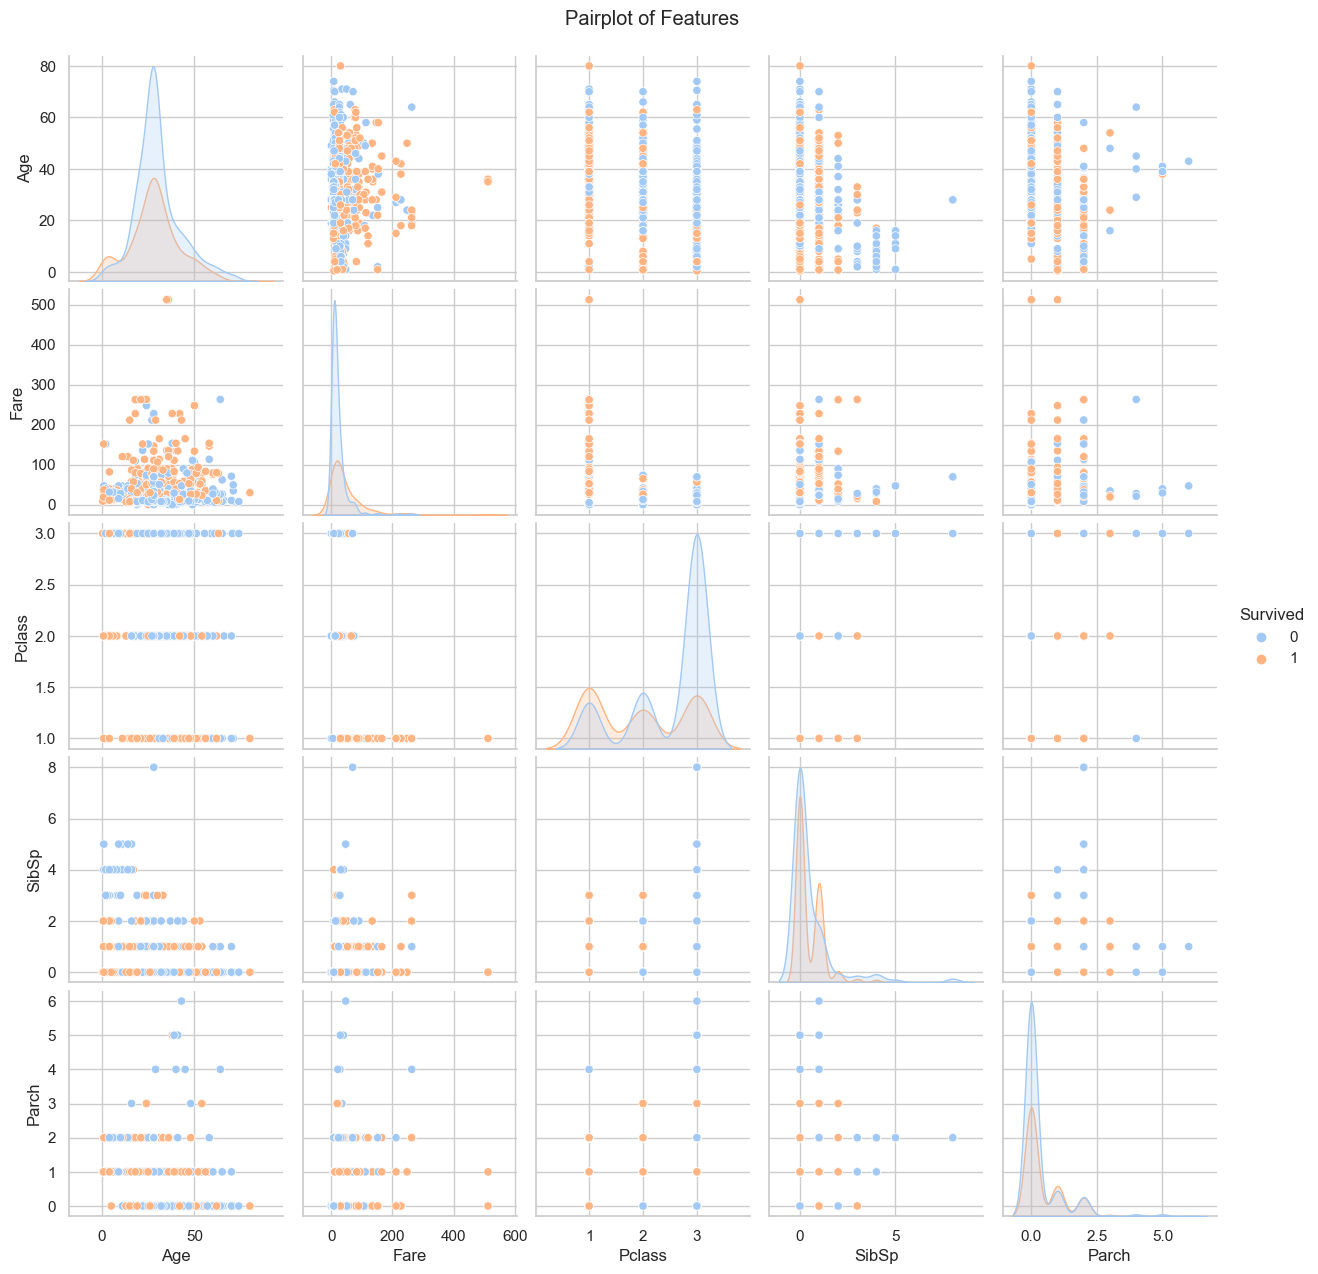

In [33]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']], hue='Survived')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

#Observation - Pairplot Distribution
Age:
Survivors (orange) are concentrated more in younger and middle-aged ranges, especially below 40.

Fare:
Survivors generally paid higher fares, visible from the dense orange dots at higher fare values.

Pclass:
More survivors in 1st class, while 3rd class had more non-survivors.

SibSp and Parch:
Survival was more likely when passengers had 1–2 family members (SibSp/Parch) — too many or none at all seem to correlate with higher non-survival.

Correlations & Clusters:
There's a visible separation between survivors & non-survivors along combinations like (Fare vs. Pclass),(Age vs. Pclass), etc.
This visual supports that Fare, Pclass, and Age are key differentiators for survival.